In [2]:
import pandas as pd

cnPapers = pd.read_excel("Provincal_Data.xlsx",names=["report","Time"])
cnPapers.head()

,report,Time
0,中共青海省委办公厅青海省人民政府办公厅关于印发《青海省乡村振兴责任制实施细则》的通知来源：省...,5
1,中共安徽省委安徽省人民政府关于做好2023年全面推进乡村振兴重点工作加快建设农业强省的实施意...,5
2,中共安徽省委安徽省人民政府关于做好2023年全面推进乡村振兴重点工作加快建设农业强省的实施意...,5
3,引号：11220000MB1642697T/2023-00937分类：科技教育;通知发文机关...,5
4,新疆维吾尔自治区农业农村厅文件新农经规[2022]7号关于印发《自治区农民合作社示范社评定及...,5


In [3]:
## 打印信息
cnPapers.info()
## 检查是否有空值
cnPapers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   report  1013 non-null   object
 1   Time    1013 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.0+ KB


report    0
Time      0
dtype: int64

In [4]:
## 删除空值
cnPapers.dropna(inplace = True)
## 检查是否有空值
cnPapers.isnull().sum()
## 打印信息
cnPapers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   report  1013 non-null   object
 1   Time    1013 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.0+ KB


In [5]:
# 时间字段的类型转换，从float转化为int
cnPapers[["Time"]] = cnPapers[["Time"]].astype(int)

In [6]:
## 按时间排序
cnPapers.sort_values("Time",inplace=True)
cnPapers.head()

,report,Time
398,中央政府门户网站今天是2023年06月24日星期六个人中心I简体繁髓I无障t首页＞政务公开＞...,1
264,索引号10001-01-2018-00002失效时间发文机关河南省人民政府成文日期2018年...,1
263,索引号10001-01-2019-00055失效时间发文机关河南省人民政府成文日期2019年...,1
262,索引号10001-01-2019-00120失效时间发文机关河南省人民政府办公厅成文日期20...,1
261,索引号10001-01-2019-00171失效时间发文机关河南省人民政府办公厅成文日期20...,1


In [7]:
cnPapers.tail()

,report,Time
115,索引号：012150SX00100/2022-69437主题分类：民政、扶贫、救灾发文机关：...,5
114,索引号：012150SX00100/2023-01389主题分类：城乡建设、环境保护发文机关...,5
113,索引号：012150SX00100/2023-04844主题分类：农业、林业、水利发文机关：...,5
133,各设区市人民政府，省人民政府各工作部门、各直属机构：《陕西省加快高标准农田建设行动方案》已经...,5
0,中共青海省委办公厅青海省人民政府办公厅关于印发《青海省乡村振兴责任制实施细则》的通知来源：省...,5


In [8]:
## 统计不同年份文献数量
cnPapers["Time"].value_counts() 

Time
1    256
4    250
3    197
5    177
2    133
Name: count, dtype: int64

In [9]:
import jieba

## 加载自定义词典

jieba.load_userdict("Prodict.txt")
stopLists = list(pd.read_csv("Prostop.txt",names=["w"], encoding="utf-8",delimiter='\t').w)

def paperCut(text):
    return [w for w in jieba.cut(text) if w not in stopLists and len(w)>1]
wordLists = [paperCut(paper) for paper in cnPapers.report]
#wordLists[0]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.420 seconds.
Prefix dict has been built successfully.


In [10]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

## 构建词篇矩阵
cnDict = Dictionary(wordLists)
cnCorpus = [cnDict.doc2bow(text) for text in wordLists]

## 进行TF-IDF计算
cn_tfidf_model = TfidfModel(cnCorpus)
cn_corpus_tfidf = cn_tfidf_model[cnCorpus]
cn_corpus_tfidf[0]

[(0, 0.010754297302211502),
 (1, 0.0035081640521541927),
 (2, 0.025951336195680328),
 (3, 0.03042375237931132),
 (4, 0.012223770479620092),
 (5, 0.01945401123853713),
 (6, 0.012853364424178929),
 (7, 0.03271748676265847),
 (8, 0.02122961731636334),
 (9, 0.006524252489156621),
 (10, 0.019654326591879285),
 (11, 0.02527822516680864),
 (12, 0.01810101505084357),
 (13, 0.009041026690718008),
 (14, 0.078866923499556),
 (15, 0.07413329293417335),
 (16, 0.013333981714469345),
 (17, 0.01621329673377631),
 (18, 0.025261848148353992),
 (19, 0.05240374979169609),
 (20, 0.025789045553868017),
 (21, 0.024660503512446693),
 (22, 0.009766827628205877),
 (23, 0.022403832448192107),
 (24, 0.026436109590272896),
 (25, 0.03218306193677622),
 (26, 0.029481712330804415),
 (27, 0.010215401528234743),
 (28, 0.02911523083897216),
 (29, 0.059074571936827164),
 (30, 0.008178308757214078),
 (31, 0.0063454543966457696),
 (32, 0.017026130152367563),
 (33, 0.002358733631365125),
 (34, 0.011783954293134797),
 (35, 0

In [11]:
from gensim.models import ldaseqmodel
## 定义时间切片2021 
time_slice = [256,133,197,250,177]



In [16]:
## 忽略警告提醒
import warnings
warnings.filterwarnings("ignore")
import numpy as np

## 主题一致性是评测主题实验效果优劣的指标,利用主题一致性判断最优主题数目
from gensim.models.coherencemodel import CoherenceModel

def cal_coherence(minTopicNums,MaxTopicNum,timeSpans):
    
    period_coherence = []
    
    for t_num in range(minTopicNums,MaxTopicNum):
        
        # corpus=None, time_slice=None, id2word=None, alphas=0.01, num_topics=10, 
        # passes=10, random_state=None, em_min_iter=6, em_max_iter=20, chunksize=100
        
        ldaseq = ldaseqmodel.LdaSeqModel(corpus = cn_corpus_tfidf, 
                                     alphas=50/t_num,
                                     id2word = cnDict, 
                                     time_slice = time_slice, 
                                     num_topics = t_num,
                                     passes=1,
                                     em_min_iter=3, 
                                     em_max_iter=6)
        one_period = []
        for span in range(timeSpans):
            topics_dtm = ldaseq.dtm_coherence(time = span)
            cm_DTM = CoherenceModel(topics = topics_dtm, 
                                    texts = wordLists, 
                                    dictionary = cnDict, 
                                    coherence = 'c_v')
            one_period.append(cm_DTM.get_coherence())
        
        period_coherence.append(np.mean(one_period, axis=0))
        
    return period_coherence

In [13]:
## 忽略警告提醒
import warnings
warnings.filterwarnings("ignore")

period_coherences = cal_coherence(3,10,5)
period_coherences

[0.2933357644952991,
 0.29887666370215155,
 0.27274561742438047,
 0.29058199425496944,
 0.28841454282353013,
 0.2889928910414769,
 0.30120415141461465]

In [32]:
goodLdaseq = ldaseqmodel.LdaSeqModel(corpus = cn_corpus_tfidf, 
                                     id2word = cnDict, 
                                     time_slice = time_slice, 
                                     num_topics = 6,
                                     random_state=100)

D:\Users\Lenovo\anaconda3\lib\site-packages\gensim\models\ldaseqmodel.py:297: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)


In [41]:
goodLdaseq.print_topics(time = 0,top_terms=100)##第一个时间段的8个主题情况

[[('旧房', 0.02103715176343871),
  ('农创客', 0.02079989723893586),
  ('集贸市场', 0.01930389947038182),
  ('绿盈', 0.013213968493634418),
  ('学法', 0.0072466601286675335),
  ('示范户', 0.006903858028414771),
  ('头雁', 0.006399012307980976),
  ('一二三', 0.0040369119078231515),
  ('科技', 0.0017542462014887403),
  ('隧洞', 0.0015421381090294749),
  ('创客', 0.001532159478629655),
  ('仪器', 0.0014319330580154074),
  ('创业', 0.0014319277715874065),
  ('加工', 0.001359943208005131),
  ('工匠', 0.0012903993089402642),
  ('创新', 0.0012030821137099458),
  ('农户', 0.0011839360237020158),
  ('培育', 0.0011698014589028153),
  ('乡村', 0.0011561912978478022),
  ('创新型', 0.0011387255917363432),
  ('扶贫', 0.001132235097759952),
  ('食品', 0.001130779762910698),
  ('企业', 0.001123698369543991),
  ('专精', 0.0011095337207530423),
  ('园区', 0.0010789806547224126),
  ('中小企业', 0.0010618573907611745),
  ('产业', 0.0010416448750129917),
  ('品牌', 0.0010345028714320043),
  ('物流', 0.0010329411541964777),
  ('脱贫', 0.0010261408989204685),
  ('农药', 0.00102

In [40]:
goodLdaseq.print_topics(time = 2,top_terms=30)
## 识别主题1在三个阶段的主题内容


[[('旧房', 0.021158646084131406),
  ('农创客', 0.020919695993393033),
  ('集贸市场', 0.01941309479231064),
  ('绿盈', 0.013281810066776477),
  ('学法', 0.007277867255350417),
  ('示范户', 0.006933128165623494),
  ('头雁', 0.006425472937043052),
  ('一二三', 0.004055959320141415),
  ('科技', 0.0017583770457948115),
  ('隧洞', 0.0015454963488691648),
  ('创客', 0.001535482319676643),
  ('仪器', 0.001434905410802937),
  ('创业', 0.0014349001061373392),
  ('加工', 0.001362669736353777),
  ('工匠', 0.0012928933435359285),
  ('创新', 0.0012052915761376552),
  ('农户', 0.0011860842320593557),
  ('培育', 0.0011719047194741882),
  ('乡村', 0.0011582515002305544),
  ('创新型', 0.001140730861473091),
  ('扶贫', 0.0011342200473943142),
  ('食品', 0.0011327601632722753),
  ('企业', 0.0011256566708060635),
  ('专精', 0.0011114480025924281),
  ('园区', 0.0010808008380712715),
  ('中小企业', 0.00106362535548415),
  ('产业', 0.0010433516894720993),
  ('品牌', 0.001036188207164789),
  ('物流', 0.001034621802270234),
  ('脱贫', 0.0010278011732327288)],
 [('高标准农田', 0.0043

In [35]:
## 打印文档主题偏好
doc = goodLdaseq.doc_topics(0) 
print (doc)

[0.00120876 0.00120876 0.00120876 0.00120876 0.00120876 0.99395621]


In [36]:
## 文档主题概率识别
sim = []
for i in range(cnPapers.report.size):
    sim.append(goodLdaseq.doc_topics(i))
tv = pd.DataFrame(sim)
sim[:9]

[array([0.00120876, 0.00120876, 0.00120876, 0.00120876, 0.00120876,
        0.99395621]),
 array([9.35248861e-04, 9.95323756e-01, 9.35248861e-04, 9.35248861e-04,
        9.35248861e-04, 9.35248861e-04]),
 array([0.00176451, 0.99117746, 0.00176451, 0.00176451, 0.00176451,
        0.00176451]),
 array([6.25352530e-04, 9.96873237e-01, 6.25352530e-04, 6.25352530e-04,
        6.25352530e-04, 6.25352530e-04]),
 array([9.01618883e-04, 9.01618883e-04, 9.01618883e-04, 9.01618883e-04,
        9.01618883e-04, 9.95491906e-01]),
 array([0.00137905, 0.00137905, 0.00137905, 0.00137905, 0.00137905,
        0.99310474]),
 array([0.00153919, 0.00153919, 0.00153919, 0.00153919, 0.00153919,
        0.99230405]),
 array([0.00111748, 0.00111748, 0.00111748, 0.00111748, 0.00111748,
        0.99441258]),
 array([0.00104259, 0.00104259, 0.00104259, 0.00104259, 0.00104259,
        0.99478703])]

In [38]:
## 转换成dataFrame
tv = pd.DataFrame(sim)
## 设置阈值
tv[tv<0.0001] = 0
tv.head()

## 阶段划分
period1 = tv.iloc[:time_slice[0]]
period2 = tv.iloc[time_slice[0]:time_slice[1]+time_slice[0]]
period3 = tv.iloc[time_slice[1]+time_slice[0]:time_slice[2]+time_slice[1]+time_slice[0]]
period4 = tv.iloc[time_slice[2]+time_slice[1]+time_slice[0]:time_slice[3]+time_slice[2]+time_slice[1]+time_slice[0]]
period5 = tv.iloc[time_slice[3]+time_slice[2]+time_slice[1]+time_slice[0]:time_slice[4]+time_slice[3]+time_slice[2]+time_slice[1]+time_slice[0]]
print("第一阶段政策数量：",len(period1))
print("第二阶段政策数量：",len(period2))
print("第三阶段政策数量：",len(period3))
print("第四阶段政策数量：",len(period4))
print("第五阶段政策数量：",len(period5))

##每个阶段平均主题支持度 
a=period1.agg("mean")
b=period2.agg("mean")
c=period3.agg("mean")
d=period4.agg("mean")
e=period5.agg("mean")
output=[a,b,c,d,e]
##type(output)


from pandas.core.frame import DataFrame
shu=DataFrame(output)
#=["topic1","topic2","topic3","topic4","topic5"]

#type(shu)
shu=shu.transpose()
shu.columns=["第一阶段","第二阶段","第三阶段","第四阶段","第五阶段"]
shu.index=["topic1","topic2","topic3","topic4","topic5",'topic6']
shu

第一阶段政策数量： 256
第二阶段政策数量： 133
第三阶段政策数量： 197
第四阶段政策数量： 250
第五阶段政策数量： 177


,第一阶段,第二阶段,第三阶段,第四阶段,第五阶段
topic1,0.046538,0.031374,0.046571,0.032874,0.040537
topic2,0.467634,0.495914,0.575934,0.550164,0.542391
topic3,0.036487,0.053928,0.030929,0.087969,0.019567
topic4,0.164262,0.191765,0.157390,0.168785,0.172568
topic5,0.059889,0.046228,0.058134,0.042193,0.044123
topic6,0.225190,0.180791,0.131042,0.118014,0.180814


D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38454 (\N{CJK UNIFIED IDEOGRAPH-9636}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(b

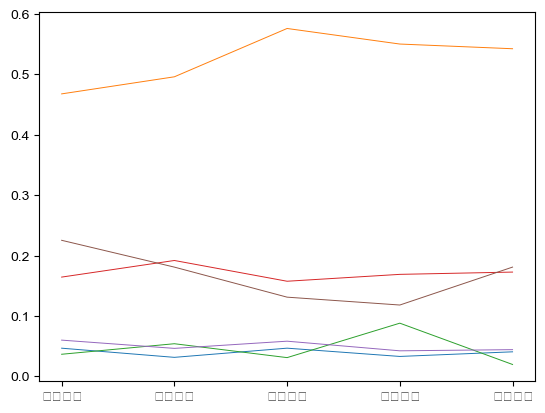

In [39]:
from matplotlib import pyplot as plt
import numpy as np
shu1=shu.transpose()
plt.plot(shu1,lw=0.7)
plt.rcParams['font.sans-serif']=['Arial']
#plt.legend()

## 输出关键词

In [30]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import itertools
#type(word_freq) 
ff=DataFrame(wordLists)
array=np.array(ff) 
aa=array.tolist()
aa=list(itertools.chain.from_iterable(array))##多维转换为一维数据



In [39]:
A=DataFrame(aa)